In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from tasrif.processing_pipeline.custom import ParticipationOverviewOperator

In [2]:
df = pd.DataFrame( [
    ['2020-02-20', 1000, 1800, 1], ['2020-02-21', 5000, 2100, 1], ['2020-02-22', 10000, 2400, 1],
    ['2020-02-20', 0, 1600, 2], ['2020-02-21', 4000, 2000, 2], ['2020-02-22', 11000, 2400, 2],
    ['2020-02-20', 500, 2000, 3], ['2020-02-21', 0, 2700, 3], ['2020-02-22', 15000, 3100, 3]],
columns=['Day', 'Steps', 'Calories', 'PersonId'])

In [3]:
op = ParticipationOverviewOperator(participant_identifier='PersonId', date_feature_name='Day')

In [4]:
df1 = op.process(df)

In [5]:
df1

[   PersonId  Day  Steps  Calories
 0         1    3      3         3
 1         2    3      3         3
 2         3    3      3         3]

In [6]:
op2 = ParticipationOverviewOperator(participant_identifier='PersonId', date_feature_name='Day', overview_type='date_vs_features')

In [7]:
df2 = op2.process(df)

In [8]:
df2

[          Day  Steps  Calories  PersonId
 0  2020-02-20      3         3         3
 1  2020-02-21      3         3         3
 2  2020-02-22      3         3         3]

In [9]:
# Count only days where the number of steps > 1000
ff = {
    'Steps': lambda x: x > 1000
}

op3 = ParticipationOverviewOperator(participant_identifier='PersonId', date_feature_name='Day', filter_features=ff)

In [10]:
df3 = op3.process(df)

In [11]:
df3

[   PersonId  Day  Steps  Calories
 0         1    3      2         3
 1         2    3      2         3
 2         3    3      1         3]

In [12]:
# Count only days where the number of steps > 1000

op4 = ParticipationOverviewOperator(participant_identifier='PersonId', date_feature_name='Day', overview_type='date_vs_features', filter_features=ff)

In [13]:
df4 = op4.process(df)

In [15]:
df4

[          Day  Steps  Calories  PersonId
 0  2020-02-20      0         3         3
 1  2020-02-21      2         3         3
 2  2020-02-22      3         3         3]

<AxesSubplot:xlabel='Day'>

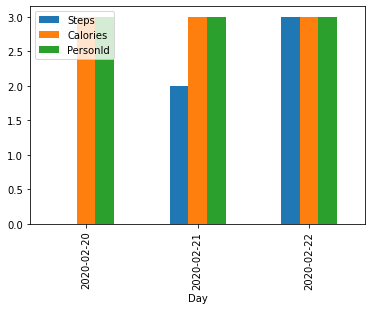

In [19]:
df4[0].plot.bar(x='Day')